In [3]:
import pandas as pd

### pandas로 dataframe형태 데이터 가져오기

In [4]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### train 데이터의 결측치 확인

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### matplotlib을 활용해서 상관관계 파악하기

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set()

In [50]:
def compare(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    newdf = pd.DataFrame([survived, dead])
    newdf.index = (['survived', 'dead'])
    newdf.plot(kind = 'bar', stacked = True, figsize = (10,5), title = feature)

In [78]:
collist = list(train.columns)
collist = [collist[idx] for idx in range(len(collist)) if idx not in [0,1,3,5,8,10]]
collist

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

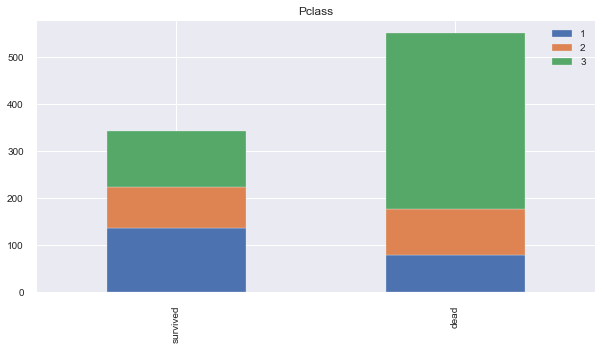

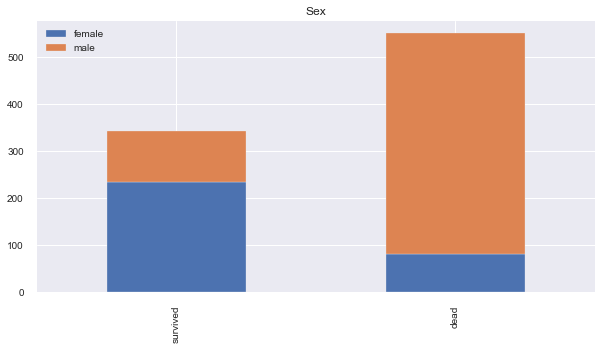

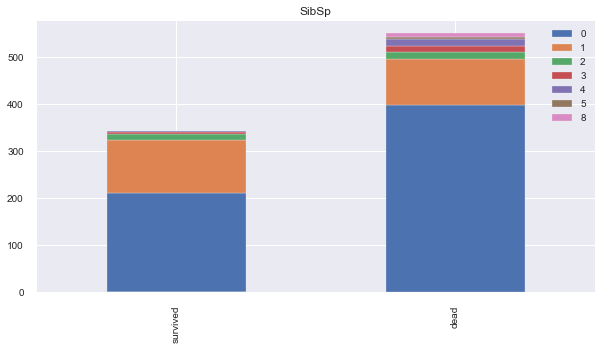

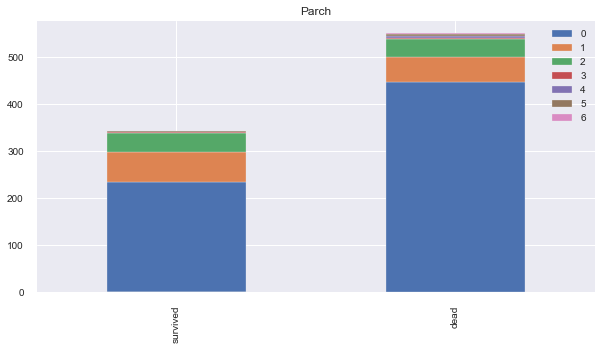

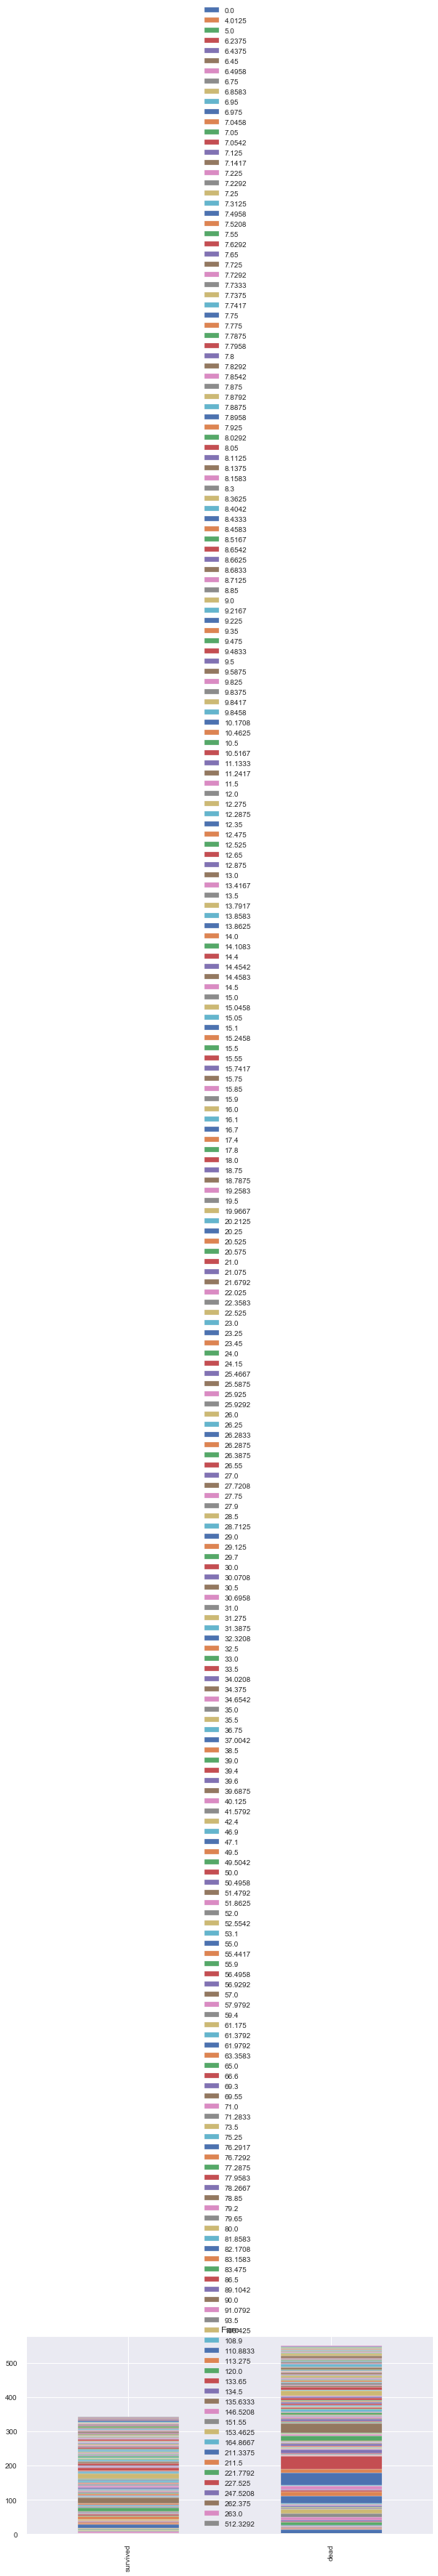

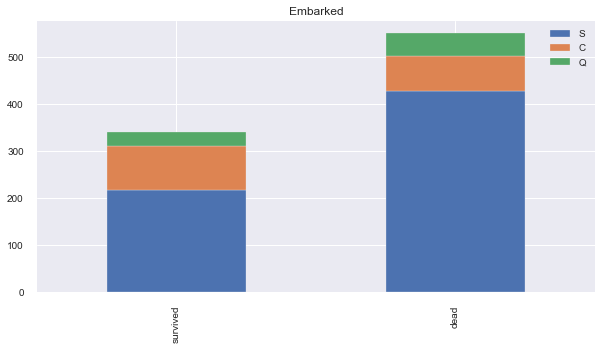

In [79]:
for ls in collist:
    compare(ls)

### pandas profiling report 활용해서 분석해보기

In [59]:
import pandas_profiling as pp

In [63]:
pp.ProfileReport(train)

In [77]:
# test = pd.DataFrame({'a' : [0,1,2,3,4], 'b' : ['짝','홀','짝','홀','짝'], 'c' : [8,7,9,5,8], 'd':[0,1,2,3,4]})
# test = pd.DataFrame({'a' : [0,1,2,3,4], 'b' : ['0','1','2','3','4'], 'c' : [8,7,9,5,8], 'd':[0,1,2,3,4]})
# pp.ProfileReport(test)

### 프로파일링 라이브러리를 여러 조건으로 확인해 본 결과 correlation은 같은 타입의 유사정도를 파악하는 용도로 사용되며, 같은 값이 아닌 같은 증감률을 같더라도 측정이 된다. 